<a href="https://colab.research.google.com/github/xayron/Amazon-Review-Sentimental-Analysis/blob/master/Sentimantal_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import re

In [42]:
df = pd.read_csv('AllProductReviews.csv')
df.head()

,ReviewTitle,ReviewBody,ReviewStar,Product
0,Honest review of an edm music lover\n,No doubt it has a great bass and to a great ex...,3,boAt Rockerz 255
1,Unreliable earphones with high cost\n,"This earphones are unreliable, i bought it be...",1,boAt Rockerz 255
2,Really good and durable.\n,"i bought itfor 999,I purchased it second time,...",4,boAt Rockerz 255
3,stopped working in just 14 days\n,Its sound quality is adorable. overall it was ...,1,boAt Rockerz 255
4,Just Awesome Wireless Headphone under 1000...😉\n,Its Awesome... Good sound quality & 8-9 hrs ba...,5,boAt Rockerz 255


In [43]:
df = df.drop('ReviewTitle', axis=1)
#df = df.drop('ReviewStar', axis=1)
df.head()

,ReviewBody,ReviewStar,Product
0,No doubt it has a great bass and to a great ex...,3,boAt Rockerz 255
1,"This earphones are unreliable, i bought it be...",1,boAt Rockerz 255
2,"i bought itfor 999,I purchased it second time,...",4,boAt Rockerz 255
3,Its sound quality is adorable. overall it was ...,1,boAt Rockerz 255
4,Its Awesome... Good sound quality & 8-9 hrs ba...,5,boAt Rockerz 255


In [0]:
#clean text
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 text = re.sub('_+', '', text)
 
 return text

In [45]:
df['ReviewBody'] = df['ReviewBody'].apply(cleanTxt)
df

,ReviewBody,ReviewStar,Product
0,No doubt it has a great bass and to a great ex...,3,boAt Rockerz 255
1,"This earphones are unreliable, i bought it be...",1,boAt Rockerz 255
2,"i bought itfor 999,I purchased it second time,...",4,boAt Rockerz 255
3,Its sound quality is adorable. overall it was ...,1,boAt Rockerz 255
4,Its Awesome... Good sound quality & 8-9 hrs ba...,5,boAt Rockerz 255
...,...,...,...
14332,Good\n,4,JBL T110BT
14333,An amazing product but a bit costly.\n,5,JBL T110BT
14334,Sound\n,1,JBL T110BT
14335,the sound is good battery life is good but the...,5,JBL T110BT


In [46]:
boats = df.loc[df.Product=='boAt Rockerz 255']
boats

,ReviewBody,ReviewStar,Product
0,No doubt it has a great bass and to a great ex...,3,boAt Rockerz 255
1,"This earphones are unreliable, i bought it be...",1,boAt Rockerz 255
2,"i bought itfor 999,I purchased it second time,...",4,boAt Rockerz 255
3,Its sound quality is adorable. overall it was ...,1,boAt Rockerz 255
4,Its Awesome... Good sound quality & 8-9 hrs ba...,5,boAt Rockerz 255
...,...,...,...
4995,Sound quality is superb..Battery life is good....,5,boAt Rockerz 255
4996,Nice earphone........ Good bt connectivity. An...,5,boAt Rockerz 255
4997,Stopped working.... Sound is breaking. Pls gui...,1,boAt Rockerz 255
4998,Awesome product... worth the price and the sou...,5,boAt Rockerz 255


In [0]:
from textblob import TextBlob

def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
   return  TextBlob(text).sentiment.polarity

In [48]:
boats['Subjectivity'] = boats['ReviewBody'].apply(getSubjectivity)
boats['Polarity'] = boats['ReviewBody'].apply(getPolarity)
boats

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ReviewBody,ReviewStar,Product,Subjectivity,Polarity
0,No doubt it has a great bass and to a great ex...,3,boAt Rockerz 255,0.496667,0.023077
1,"This earphones are unreliable, i bought it be...",1,boAt Rockerz 255,0.519388,0.269388
2,"i bought itfor 999,I purchased it second time,...",4,boAt Rockerz 255,0.476190,0.150000
3,Its sound quality is adorable. overall it was ...,1,boAt Rockerz 255,0.500000,0.400000
4,Its Awesome... Good sound quality & 8-9 hrs ba...,5,boAt Rockerz 255,0.691111,0.195000
...,...,...,...,...,...
4995,Sound quality is superb..Battery life is good....,5,boAt Rockerz 255,0.400000,0.400000
4996,Nice earphone........ Good bt connectivity. An...,5,boAt Rockerz 255,0.733333,0.666667
4997,Stopped working.... Sound is breaking. Pls gui...,1,boAt Rockerz 255,0.400000,0.400000
4998,Awesome product... worth the price and the sou...,5,boAt Rockerz 255,0.600000,0.575000


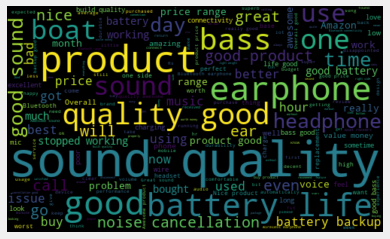

In [49]:
# Plotting word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

allWords = ' '.join([twts for twts in boats['ReviewBody']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [64]:
def getAnalysis(score):
 if score < 0:
  return 'Negative'
 elif score == 0:
  return 'Neutral'
 else:
  return 'Positive'

boats['Analysis'] = boats['Polarity'].apply(getAnalysis)

# Show the dataframe
boats

,ReviewBody,ReviewStar,Product,Subjectivity,Polarity,Analysis
2499,Never buy this product ....... I raised a requ...,1,boAt Rockerz 255,1.000000,-1.000000,Negative
3036,Connectivity is very poor...... It sounds like...,1,boAt Rockerz 255,0.649333,-0.086000,Negative
3077,Zero for durability. Its been 2 months and one...,1,boAt Rockerz 255,0.360000,-0.280000,Negative
3150,Worst headphones brought from Amazon totally d...,1,boAt Rockerz 255,0.916667,-0.916667,Negative
3158,The other side person find difficult to hear m...,2,boAt Rockerz 255,0.595833,-0.045833,Negative
...,...,...,...,...,...,...
4017,Good product\n,4,boAt Rockerz 255,0.600000,0.700000,Positive
4018,Great product. Sound quality average. Nice des...,4,boAt Rockerz 255,0.608333,0.475000,Positive
4019,Sound quality same as I expected ..superb bass...,5,boAt Rockerz 255,0.485000,0.150000,Positive
4002,Good product value for money.\n,5,boAt Rockerz 255,0.600000,0.700000,Positive


In [91]:
#boats = boats.sort_values(by = ['Analysis'])
#boats
bt = boats.groupby(['Analysis', 'ReviewStar']).mean().round(1)
bt['Size'] = boats.groupby(['Analysis', 'ReviewStar']).size()
bt

Subjectivity  Polarity  Size
Analysis ReviewStar                              
Negative 1                    0.5      -0.3   406
         2                    0.5      -0.2   122
         3                    0.5      -0.2   102
         4                    0.5      -0.2    84
         5                    0.5      -0.2    56
Neutral  1                    0.1       0.0   138
         2                    0.1       0.0    29
         3                    0.1       0.0    44
         4                    0.1       0.0    72
         5                    0.1       0.0   109
Positive 1                    0.5       0.2   315
         2                    0.5       0.2   182
         3                    0.5       0.3   427
         4                    0.6       0.4  1120
         5                    0.6       0.5  1794

In [92]:
# Count nuber of reviews acc to sentiments
import numpy as np

positive = np.sum(boats['Analysis'] == 'Positive')
negative = np.sum(boats['Analysis'] == 'Negative')
neutral = np.sum(boats['Analysis'] == 'Neutral')

print(positive)
print(negative)
print(neutral)

3838
770
392


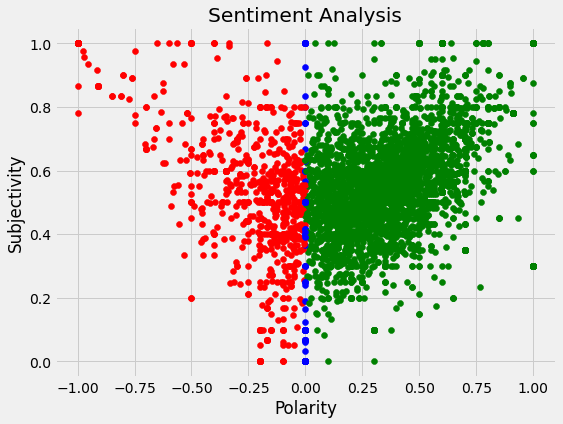

In [100]:
plt.figure(figsize=(8,6))
for i in range(0, boats.shape[0]):
  if boats['Analysis'][i] == 'Positive':
    plt.scatter(boats["Polarity"][i], boats["Subjectivity"][i], color='Green')
  elif boats['Analysis'][i] == 'Negative':
    plt.scatter(boats["Polarity"][i], boats["Subjectivity"][i], color='Red')
  else:
    plt.scatter(boats["Polarity"][i], boats["Subjectivity"][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

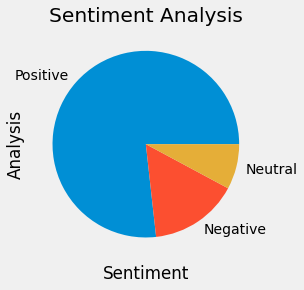

In [104]:
# Show the value counts
boats['Analysis'].value_counts()

# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
boats['Analysis'].value_counts().plot(kind = 'pie')
plt.show()